In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
import fastf1.legacy

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import matplotlib.font_manager as fm

import pandas as pd

import seaborn as sns

In [2]:
ff1.Cache.enable_cache('Cache')

In [3]:
plotting.setup_mpl()

In [4]:
year = 2023
gp = 'Brazil'
event = 'R'

In [5]:
session = ff1.get_session(year, gp, event)

In [6]:
session.load()

core           INFO 	Loading data for São Paulo Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
c:\Users\larsl\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\larsl\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\larsl\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future ve

In [7]:
ver_laps = session.laps.pick_driver('VER').pick_quicklaps().reset_index()
nor_laps = session.laps.pick_driver('NOR').pick_quicklaps().reset_index()

,LapTime_seconds
LapNumber,
5,75.0
6,75.0
7,75.0
8,75.0
9,76.0
...,...
67,73.0
68,73.0
69,74.0


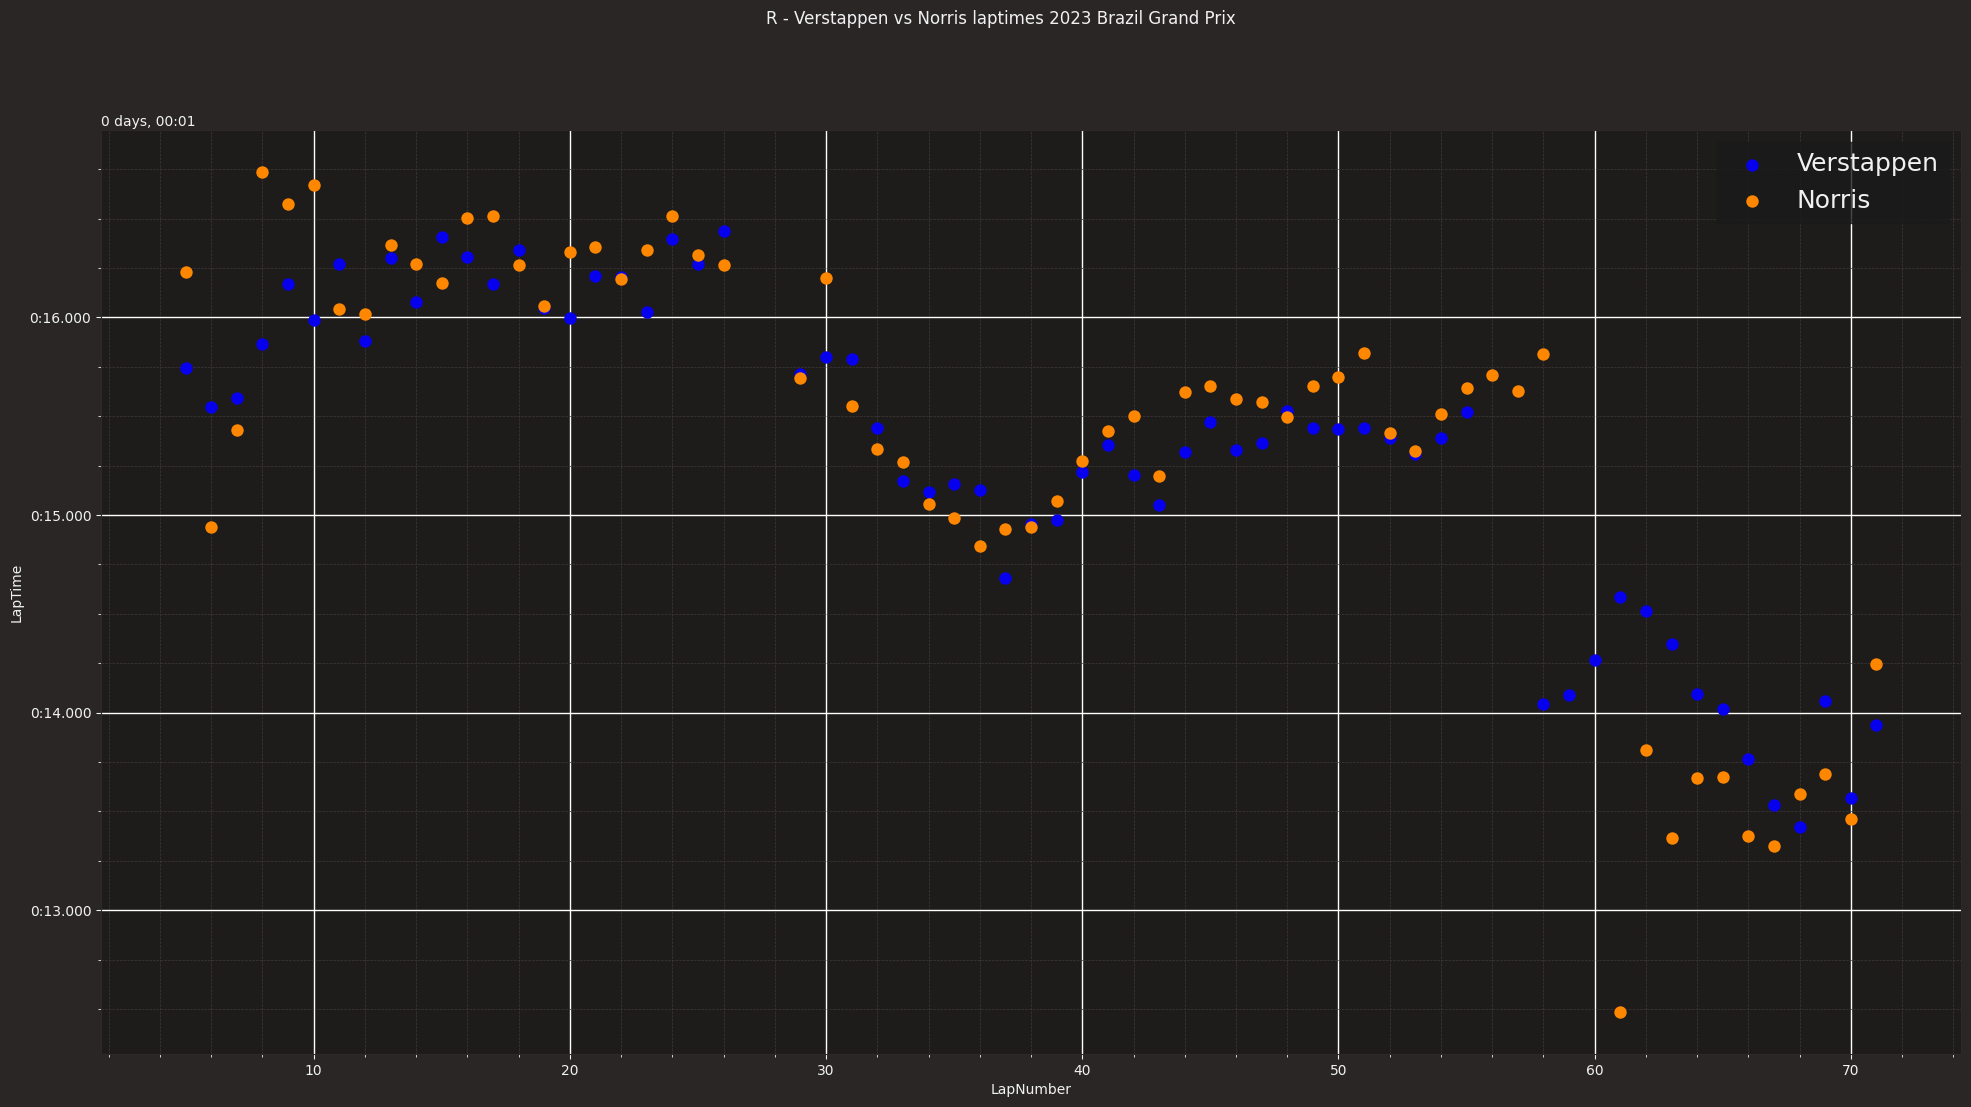

In [9]:
fig, ax = plt.subplots(figsize=(24, 12))
title = f'{str(event)} - Verstappen vs Norris laptimes {str(year)} {str(gp)} Grand Prix'
plt.suptitle(title)
plt.grid(color='w', which='major', axis='both')
sns.scatterplot(data=ver_laps,
               x='LapNumber',
               y='LapTime',
               ax=ax,
               s=80,
               linewidth=0,
               label='Verstappen',
               color='#0600ef').invert_yaxis()
sns.scatterplot(data=nor_laps,
               x='LapNumber',
               y='LapTime',
               ax=ax,
               s=80,
               linewidth=0,
               label='Norris',
               color='#ff8700').invert_yaxis()
plt.legend(fontsize=18)

fig.savefig(f'Figures/{title}.png')

ver_laps['LapNumber'] = ver_laps['LapNumber'].astype(int)
laps_dataframe = pd.DataFrame(ver_laps, columns=['LapNumber', 'LapTime']).set_index('LapNumber')
laps_dataframe['LapTime'] = pd.to_timedelta(laps_dataframe['LapTime'])
laps_dataframe['LapTime_seconds'] = laps_dataframe['LapTime'].dt.total_seconds() - laps_dataframe['LapTime'].astype(str).str[-7:].astype(float)
laps_dataframe.drop(columns=['LapTime'], inplace=True)

laps_dataframe